In [1]:
from pivpy import io, graphics, pivpy
import os
data = io.load_vec('../../tests/data/exp1_001_b.txt',variables='x,y,u,v')
data = data.piv.vec2scal('vorticity')

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a1f2f0780>)

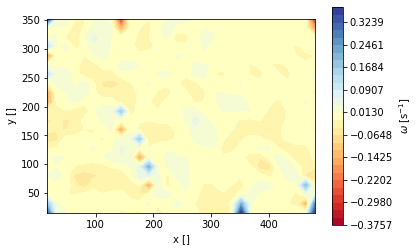

In [7]:
graphics.contour_plot(data.isel(t=0))

In [8]:
data = data.piv.vec2scal('tke')

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a1f5c7048>)

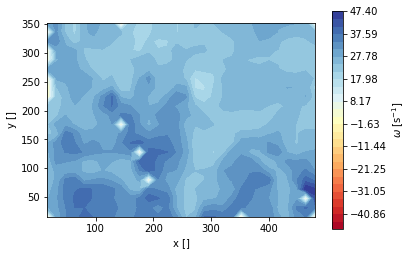

In [9]:
graphics.contour_plot(data.isel(t=0))